# NEW EAGLE and TNG Values from Ben May 12-14 ish 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 40

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 20,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 16,
          'xtick.minor.size': 13,
          'ytick.major.size': 16,
          'ytick.minor.size': 13}
plt.rcParams.update(params)

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

import seaborn as sns
pal = sns.color_palette("pastel")

import pickle

from pymccorrelation import pymccorrelation
import linmix

from scipy.stats import kendalltau
from seaborn.algorithms import bootstrap

In [2]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
#Bring in all the COS-Holes fit data and modifying
cosholes_df = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/cosholes_df.csv')
cosholes_df

,galaxy,QSO,zgal,Vhelio [km/s],MBH,sigMBH,M*,Mhalo,SFR,vrel,...,wav,zsys,N,sigN,b,sigb,vel,sigvel,comp,uplim
0,NGC3489,J1101,0.002258,676.90,6.770,0.065,10.20,11.782755,-0.967,10.751189,...,1548.204,0.002230,13.403000,0.099000,35.700,11.549,2.357,7.816,1,1
1,NGC4026,J1159,0.003286,985.10,8.255,0.125,10.43,11.964435,-1.767,13.641094,...,1548.204,0.003300,13.697000,0.074000,80.715,17.306,-9.444,12.162,1,1
2,NGC4258,J1220,0.001494,461.08,7.577,0.030,10.88,12.522479,-0.080,0.000000,...,1550.781,0.001494,13.650000,0.050000,0.000,0.000,0.000,0.000,1,0
3,NGC4258,J1222,0.001494,461.08,7.577,0.030,10.88,12.522479,-0.080,0.000000,...,1550.781,0.001494,13.500000,0.050000,0.000,0.000,0.000,0.000,1,0
4,NGC4736,J1249,0.001027,307.80,6.830,0.123,10.62,12.154667,-0.061,0.000000,...,1548.204,0.000000,14.311323,0.123487,0.000,0.000,0.000,0.000,2,1
5,NGC4736,J1249,0.001027,307.80,6.830,0.123,10.62,12.154667,-0.061,166.647701,...,1548.204,0.000510,13.855000,0.052000,34.300,6.220,11.655,3.925,0,1
6,NGC4736,J1249,0.001027,307.80,6.830,0.123,10.62,12.154667,-0.061,62.794963,...,1548.204,0.000810,13.652000,0.103000,10.925,4.852,-2.260,2.533,0,1
7,NGC4736,J1249,0.001027,307.80,6.830,0.123,10.62,12.154667,-0.061,29.956925,...,1548.204,0.001090,13.946000,0.044000,30.000,4.293,-11.070,2.849,0,1
8,NGC3414,J1051,0.004900,1469.80,8.400,0.071,10.79,12.377581,-1.047,150.546380,...,1548.204,0.004420,13.990000,0.057000,32.780,5.621,6.646,3.813,1,1
9,NGC3627,J1123,0.002430,721.00,6.920,0.048,10.84,12.455645,0.536,117.031587,...,1548.204,0.002750,14.012000,0.076000,85.000,17.787,-21.098,12.763,1,1


In [4]:
#DATA frame for just the upper limits 

up_ch = cosholes_df.loc[(cosholes_df['uplim'] == 0)]
up_ch

,galaxy,QSO,zgal,Vhelio [km/s],MBH,sigMBH,M*,Mhalo,SFR,vrel,...,wav,zsys,N,sigN,b,sigb,vel,sigvel,comp,uplim
2,NGC4258,J1220,0.001494,461.08,7.577,0.030,10.88,12.522479,-0.080,0.0,...,1550.781,0.001494,13.65,0.05,0.0,0.0,0.0,0.0,1,0
3,NGC4258,J1222,0.001494,461.08,7.577,0.030,10.88,12.522479,-0.080,0.0,...,1550.781,0.001494,13.50,0.05,0.0,0.0,0.0,0.0,1,0
11,NGC4564,J1235,0.003809,1141.90,7.940,0.145,10.40,11.938382,-1.988,0.0,...,1550.781,0.003809,13.38,0.05,0.0,0.0,0.0,0.0,1,0


In [5]:
#Df of just the sums for the whole data set (use this for everything but the relative velocity plot) with no uplims 

sum_ch = cosholes_df.loc[(cosholes_df['comp'] > 0) & (cosholes_df['uplim'] == 1)]
sum_ch

,galaxy,QSO,zgal,Vhelio [km/s],MBH,sigMBH,M*,Mhalo,SFR,vrel,...,wav,zsys,N,sigN,b,sigb,vel,sigvel,comp,uplim
0,NGC3489,J1101,0.002258,676.9,6.770,0.065,10.20,11.782755,-0.967,10.751189,...,1548.204,0.00223,13.403000,0.099000,35.700,11.549,2.357,7.816,1,1
1,NGC4026,J1159,0.003286,985.1,8.255,0.125,10.43,11.964435,-1.767,13.641094,...,1548.204,0.00330,13.697000,0.074000,80.715,17.306,-9.444,12.162,1,1
4,NGC4736,J1249,0.001027,307.8,6.830,0.123,10.62,12.154667,-0.061,0.000000,...,1548.204,0.00000,14.311323,0.123487,0.000,0.000,0.000,0.000,2,1
8,NGC3414,J1051,0.004900,1469.8,8.400,0.071,10.79,12.377581,-1.047,150.546380,...,1548.204,0.00442,13.990000,0.057000,32.780,5.621,6.646,3.813,1,1
9,NGC3627,J1123,0.002430,721.0,6.920,0.048,10.84,12.455645,0.536,117.031587,...,1548.204,0.00275,14.012000,0.076000,85.000,17.787,-21.098,12.763,1,1
10,NGC1097,J0246,0.004240,1271.1,8.140,0.090,10.50,12.029020,0.766,24.205849,...,1548.204,0.00422,14.211000,0.053000,54.100,7.973,18.210,5.687,1,1


In [6]:
#Df of all the components for the whole data set (use this for just the relative velocity plot) with no uplims 
com_ch = cosholes_df.loc[(cosholes_df['comp'] < 2) & (cosholes_df['uplim'] == 1)]
com_ch

,galaxy,QSO,zgal,Vhelio [km/s],MBH,sigMBH,M*,Mhalo,SFR,vrel,...,wav,zsys,N,sigN,b,sigb,vel,sigvel,comp,uplim
0,NGC3489,J1101,0.002258,676.9,6.770,0.065,10.20,11.782755,-0.967,10.751189,...,1548.204,0.00223,13.403,0.099,35.700,11.549,2.357,7.816,1,1
1,NGC4026,J1159,0.003286,985.1,8.255,0.125,10.43,11.964435,-1.767,13.641094,...,1548.204,0.00330,13.697,0.074,80.715,17.306,-9.444,12.162,1,1
5,NGC4736,J1249,0.001027,307.8,6.830,0.123,10.62,12.154667,-0.061,166.647701,...,1548.204,0.00051,13.855,0.052,34.300,6.220,11.655,3.925,0,1
6,NGC4736,J1249,0.001027,307.8,6.830,0.123,10.62,12.154667,-0.061,62.794963,...,1548.204,0.00081,13.652,0.103,10.925,4.852,-2.260,2.533,0,1
7,NGC4736,J1249,0.001027,307.8,6.830,0.123,10.62,12.154667,-0.061,29.956925,...,1548.204,0.00109,13.946,0.044,30.000,4.293,-11.070,2.849,0,1
8,NGC3414,J1051,0.004900,1469.8,8.400,0.071,10.79,12.377581,-1.047,150.546380,...,1548.204,0.00442,13.990,0.057,32.780,5.621,6.646,3.813,1,1
9,NGC3627,J1123,0.002430,721.0,6.920,0.048,10.84,12.455645,0.536,117.031587,...,1548.204,0.00275,14.012,0.076,85.000,17.787,-21.098,12.763,1,1
10,NGC1097,J0246,0.004240,1271.1,8.140,0.090,10.50,12.029020,0.766,24.205849,...,1548.204,0.00422,14.211,0.053,54.100,7.973,18.210,5.687,1,1


In [7]:
#M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2_det_sum = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/amiga_2_det_sum.csv')
amiga_2_det_sum = amiga_2_det_sum.loc[(amiga_2_det_sum['sumlogN']!= 0)]
amiga_2_det_sum = amiga_2_det_sum.loc[amiga_2_det_sum['MS']==0]

#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
#making sure to use r200 as a substitute for since that is what we used 
amiga_m31_rvrir = 230 #kpc This is the value used for R200 in the paper? 

amiga_det_R = np.array(amiga_2_det_sum['Rad'])
amiga_det_RRvir = amiga_det_R/amiga_m31_rvrir

#amiga_2_det_sum

In [8]:
#M31 Data (Project AMIGA) non-detections (upper limits) and taking out the MS contamination
amiga_2_up_sum = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/amiga_2_up_sum.csv')
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['sumlogN']!= 0)]
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['MS']== 0)]

#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_up_R = np.array(amiga_2_up_sum['Rad'])
amiga_up_RRvir = amiga_up_R/amiga_m31_rvrir

#amiga_2_up_sum

In [9]:
#creating masks to separate into high and low 
low_mask, high_mask = (cosholes_df["MBH"] <= 7.6), (cosholes_df["MBH"] > 7.6)

In [10]:
#EAGLE

df_r_new_low = pd.read_table("/Users/samgarza/Documents/COS-Holes/EAGLE.COS-Holes/May12.MS10_11/profile_coll_kpc_EAGLE.halo.list.CIV_median.MBH50_97_2bins.MS100_110.5.0_7.375.dat",sep=" ")
df_r_new_high = pd.read_table("/Users/samgarza/Documents/COS-Holes/EAGLE.COS-Holes/May12.MS10_11/profile_coll_kpc_EAGLE.halo.list.CIV_median.MBH50_97_2bins.MS100_110.7.375_9.75.dat",sep=" ")

In [11]:
# TNG 

df_r_new_lowtng = pd.read_table("/Users/samgarza/Documents/COS-Holes/EAGLE.COS-Holes/May12.MS10_11/profile_coll_kpc_TNG.halo.list.CIV_median.MBH60_104_2bins.MS100_110.6.05_8.225.dat",sep=" ")
df_r_new_hightng = pd.read_table("/Users/samgarza/Documents/COS-Holes/EAGLE.COS-Holes/May12.MS10_11/profile_coll_kpc_TNG.halo.list.CIV_median.MBH60_104_2bins.MS100_110.8.225_10.4.dat",sep=" ")

<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_29542/3177835269.py:10: DeprecationWarning: invalid escape sequence \o
  plt.plot(df_r_new_high['#R(kpc)'], df_r_new_high['median'], color = CB_color_cycle[3], lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 7.4-9.8; n=710')
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_29542/3177835269.py:12: DeprecationWarning: invalid escape sequence \o
  plt.plot(df_r_new_low['#R(kpc)'], df_r_new_low['median'], color = CB_color_cycle[2], lw = 5, label

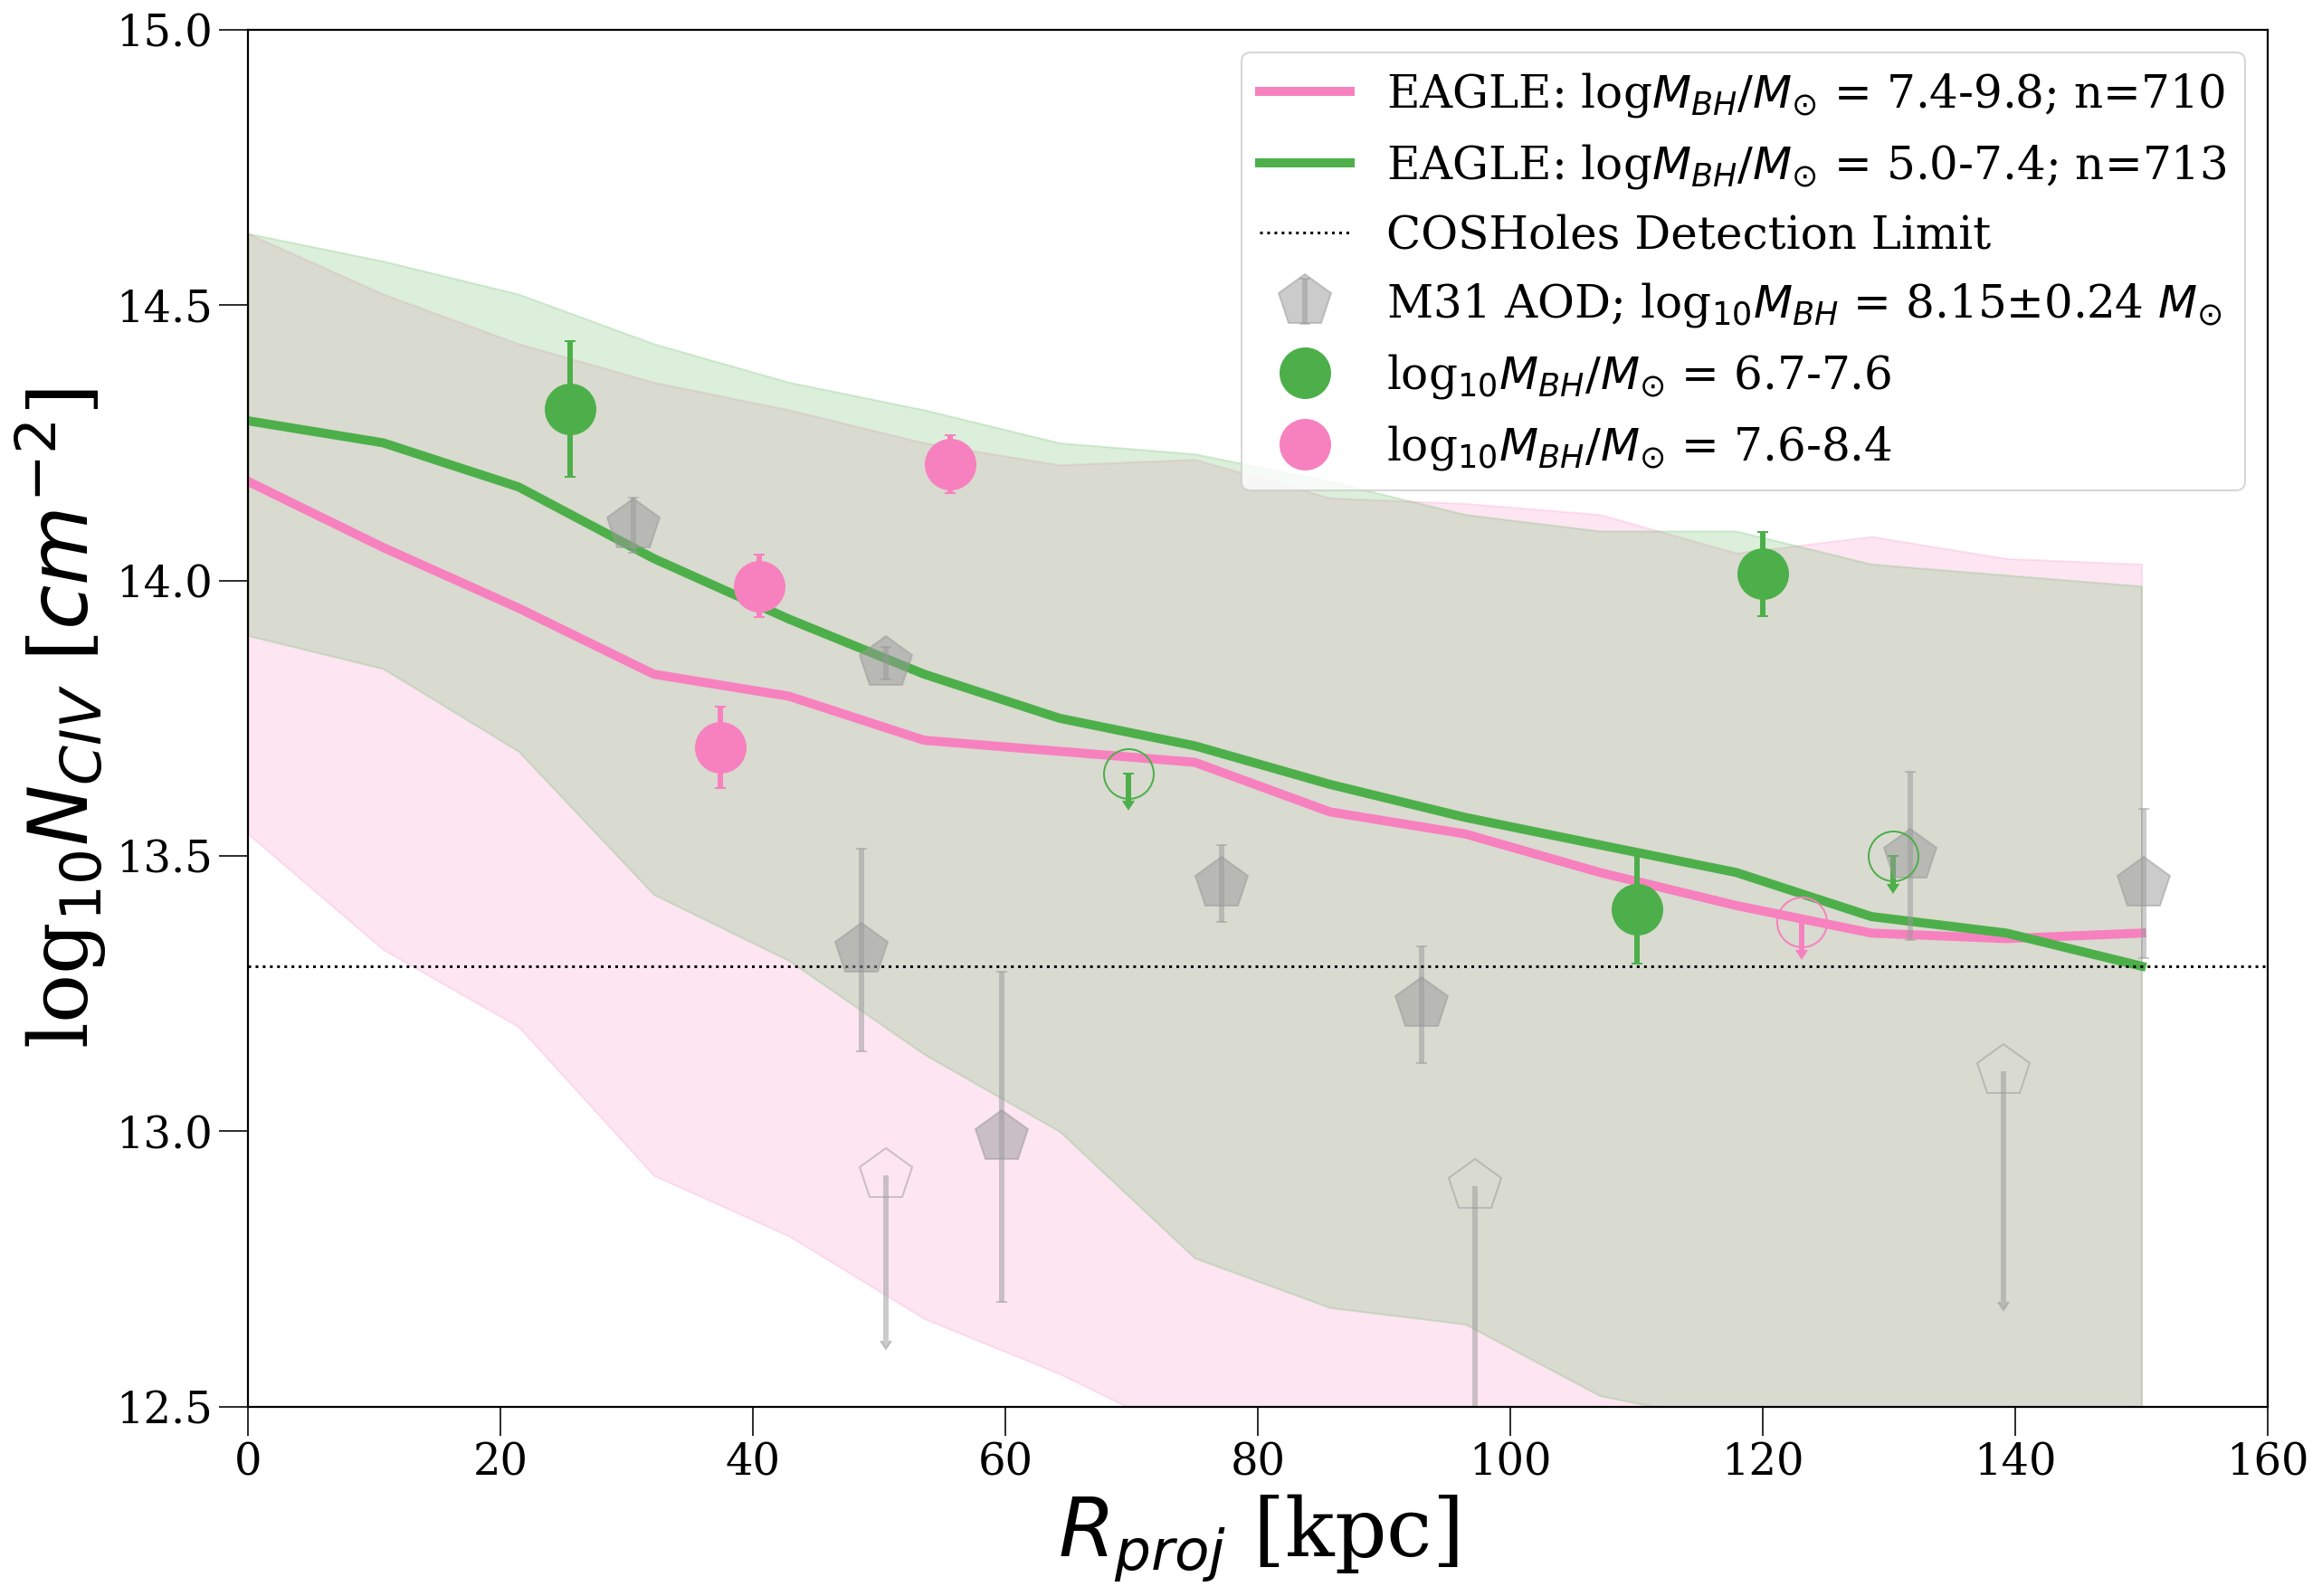

In [53]:
#Plotting NCIV vs Rproj for EAGLE 
    
fig, ax = plt.subplots()

########################################################

#EAGLE Simulational Data

plt.fill_between(df_r_new_high['#R(kpc)'], df_r_new_high['16percentile'], df_r_new_high['84percentile'], alpha = 0.2, color = CB_color_cycle[3])
plt.plot(df_r_new_high['#R(kpc)'], df_r_new_high['median'], color = CB_color_cycle[3], lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 7.4-9.8; n=710')
plt.fill_between(df_r_new_low['#R(kpc)'], df_r_new_low['16percentile'], df_r_new_low['84percentile'], alpha = 0.2, color = CB_color_cycle[2])
plt.plot(df_r_new_low['#R(kpc)'], df_r_new_low['median'], color = CB_color_cycle[2], lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 5.0-7.4; n=713')

   
########################################################

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 , used lightgrey before 

##### M31 Detections (Sums) 
plt.errorbar (amiga_2_det_sum['Rad'], amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = CB_color_cycle[6], 
              alpha = 0.5, marker="p", markersize=30, label='M31 AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24 $M_{\odot}$', ls='none', elinewidth=3)

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_2_up_sum['Rad'], amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = CB_color_cycle[6], 
              alpha =0.5, marker="p",mfc='none',markersize=30, ls='none', elinewidth=3)

########################################################

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')

for mask, colour, label in zip([low_mask, high_mask], [CB_color_cycle[2], CB_color_cycle[3]], 
                               [r"log$_{10}M_{BH}/M_{\odot}$ = 6.7-7.6", 
                                r"log$_{10}M_{BH}/M_{\odot}$ = 7.6-8.4"]):
    
    ax.errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask],yerr=sum_ch['sigN'][mask], 
                capsize = 3, c = colour, marker=".", markersize=55, label=label, ls='none', elinewidth=3)
    
    ax.errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], yerr=up_ch['sigN'][mask], 
                capsize = 3, c = colour, marker=".", markersize=55, ls='none', uplims=True, mfc='none', elinewidth=3)

ax.legend(loc=1, fontsize=25)
ax.set_xlabel(r"$R_{proj}$ [kpc]", fontsize=45)
ax.set_ylabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=45)
ax.set_ylim(12.5, 15)
ax.set_xlim(0, 160)
#plt.savefig('Figures/nciv_eaglenew_vs_r.png')
plt.show()

<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
<>:10: DeprecationWarning: invalid escape sequence \o
<>:12: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \p
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_29542/491529565.py:10: DeprecationWarning: invalid escape sequence \o
  plt.plot(df_r_new_hightng['#R(kpc)'], df_r_new_hightng['median'], color = CB_color_cycle[3], lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 8.2-10.4; n=1054')
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_29542/491529565.py:12: DeprecationWarning: invalid escape sequence \o
  plt.plot(df_r_new_lowtng['#R(kpc)'], df_r_new_lowtng['median'], color = CB_color_cycle[2], lw 

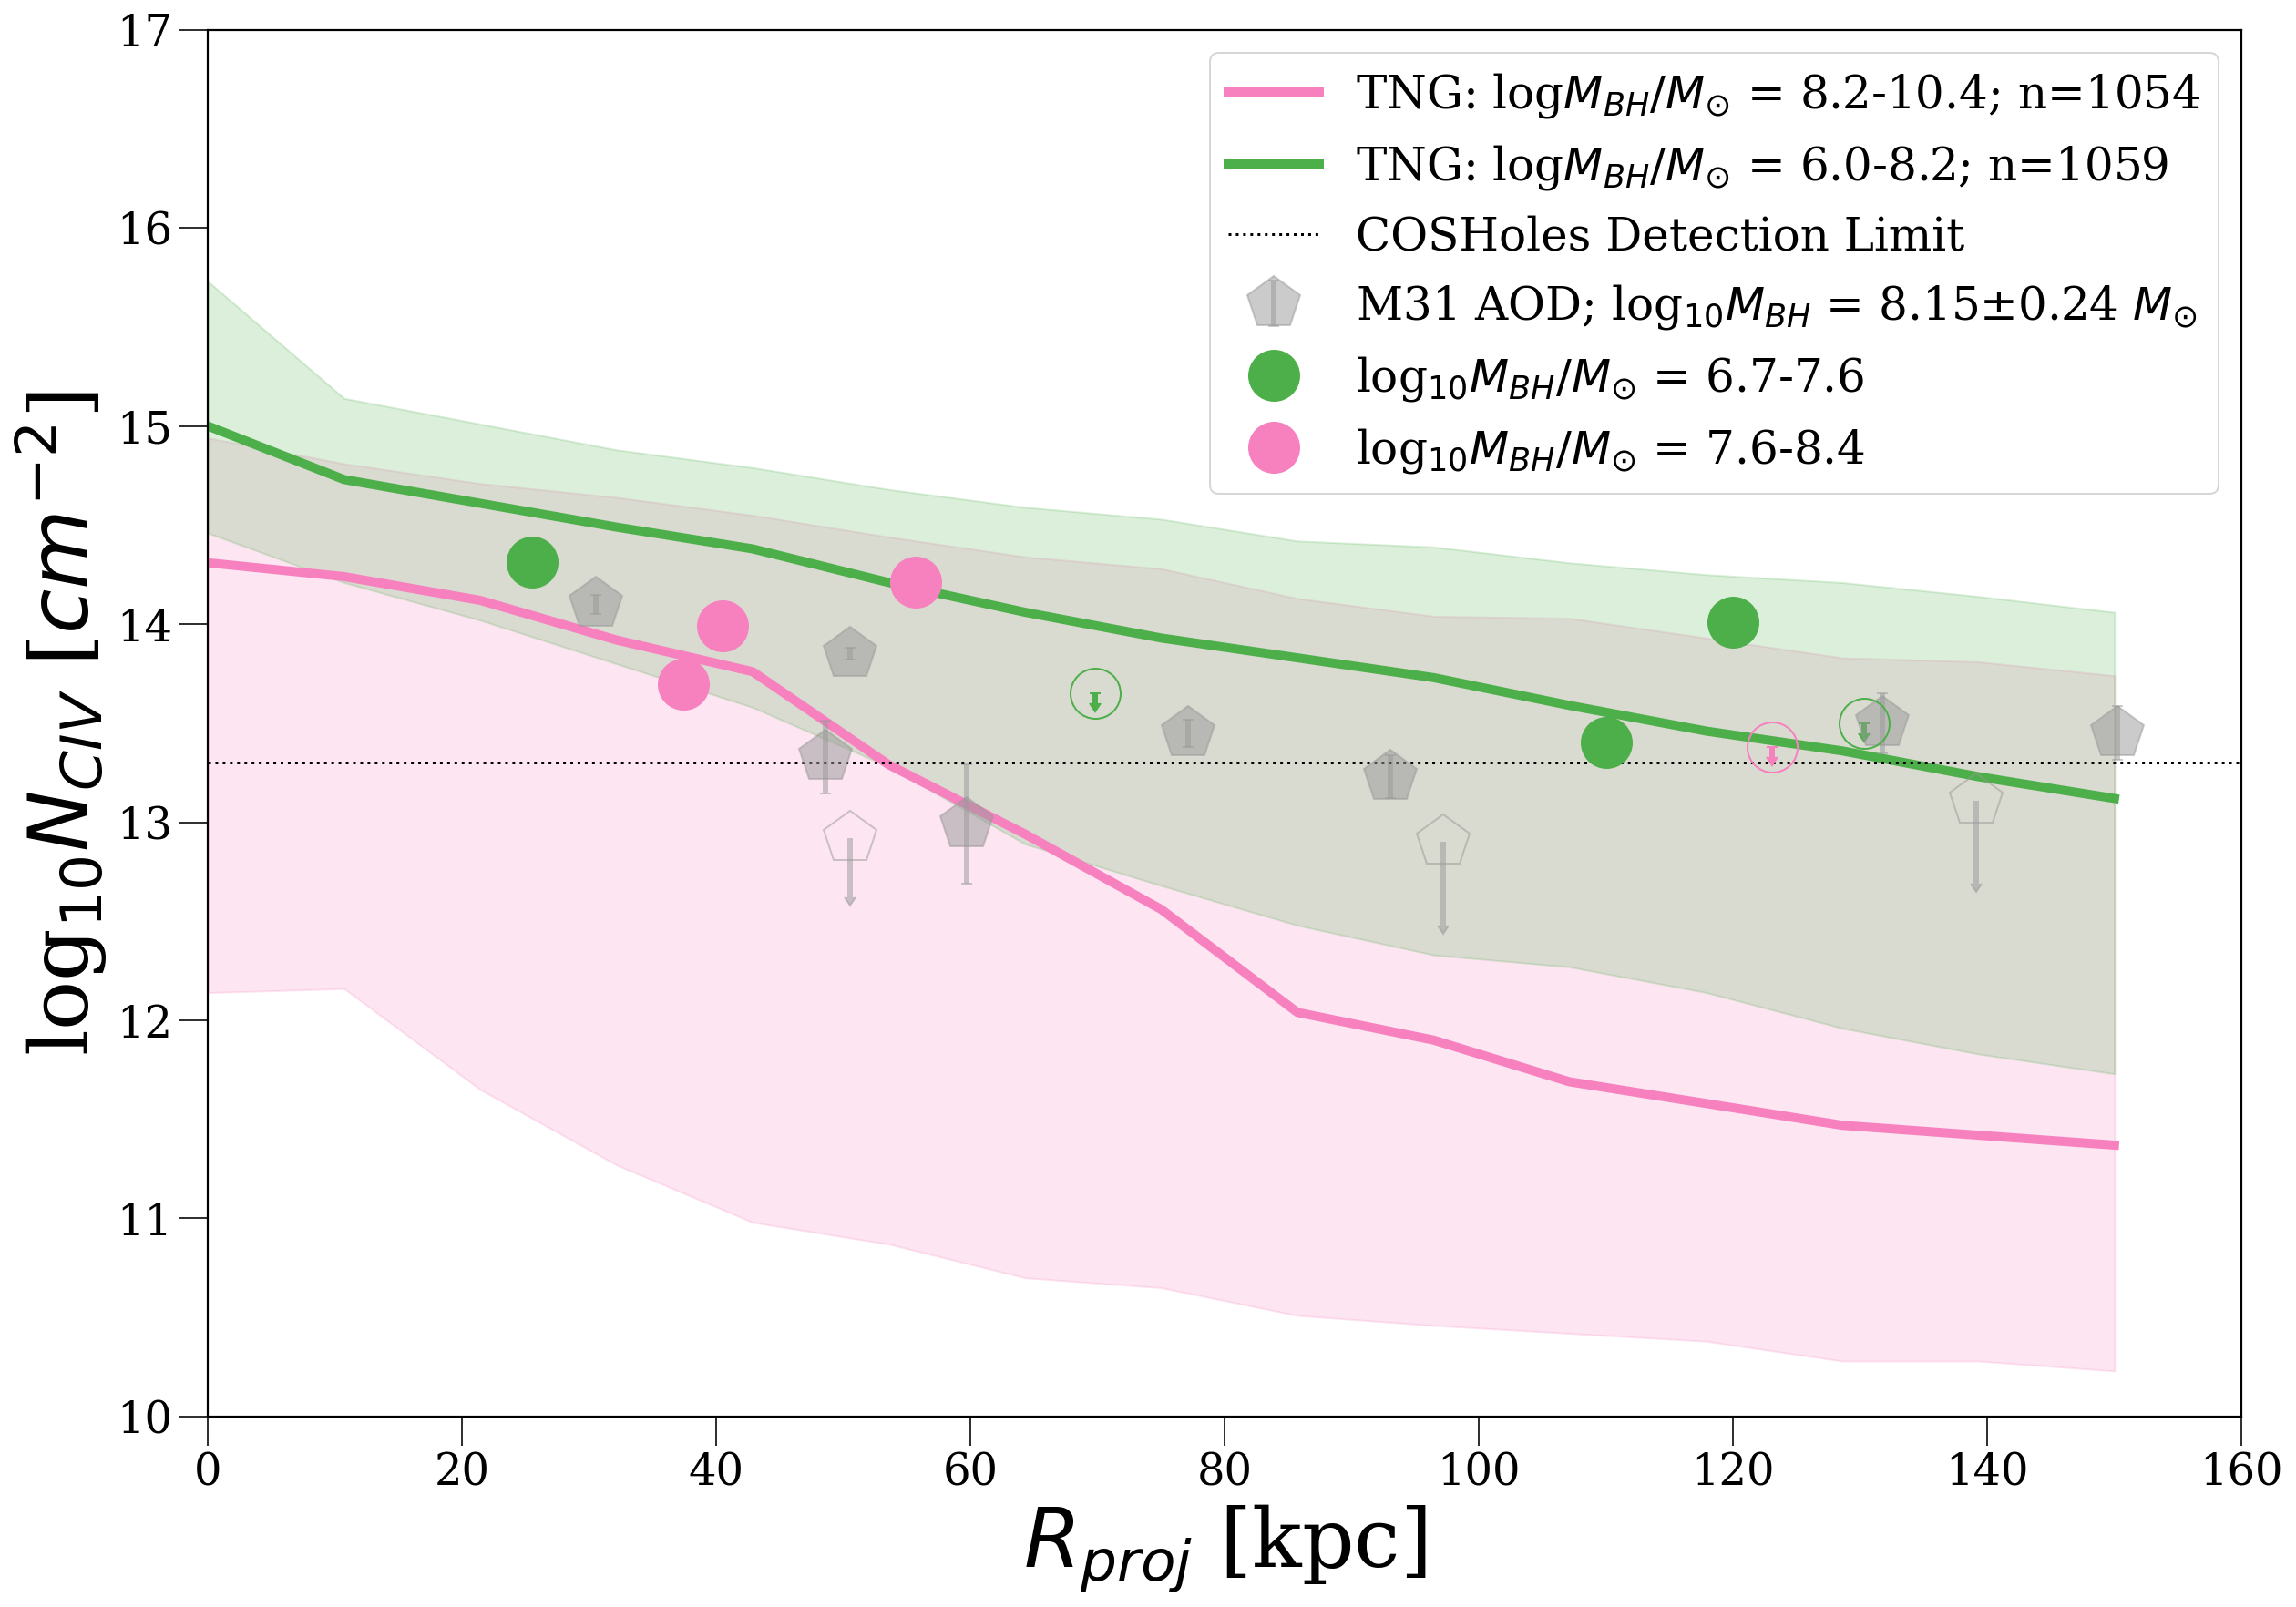

In [52]:
#Plotting NCIV vs Rproj for TNG 
    
fig, ax = plt.subplots()

########################################################

#EAGLE Simulational Data

plt.fill_between(df_r_new_hightng['#R(kpc)'], df_r_new_hightng['16percentile'], df_r_new_hightng['84percentile'], alpha = 0.2, color = CB_color_cycle[3])
plt.plot(df_r_new_hightng['#R(kpc)'], df_r_new_hightng['median'], color = CB_color_cycle[3], lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 8.2-10.4; n=1054')
plt.fill_between(df_r_new_lowtng['#R(kpc)'], df_r_new_lowtng['16percentile'], df_r_new_lowtng['84percentile'], alpha = 0.2, color = CB_color_cycle[2])
plt.plot(df_r_new_lowtng['#R(kpc)'], df_r_new_lowtng['median'], color = CB_color_cycle[2], lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 6.0-8.2; n=1059')

   
########################################################

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 , used lightgrey before 

##### M31 Detections (Sums) 
plt.errorbar (amiga_2_det_sum['Rad'], amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = CB_color_cycle[6], 
              alpha = 0.5, marker="p", markersize=30, label='M31 AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24 $M_{\odot}$', ls='none', elinewidth=3)

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_2_up_sum['Rad'], amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = CB_color_cycle[6], 
              alpha =0.5, marker="p",mfc='none',markersize=30, ls='none', elinewidth=3)

########################################################

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')

for mask, colour, label in zip([low_mask, high_mask], [CB_color_cycle[2], CB_color_cycle[3]], 
                               [r"log$_{10}M_{BH}/M_{\odot}$ = 6.7-7.6", 
                                r"log$_{10}M_{BH}/M_{\odot}$ = 7.6-8.4"]):
    
    ax.errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask],yerr=sum_ch['sigN'][mask], 
                capsize = 3, c = colour, marker=".", markersize=55, label=label, ls='none', elinewidth=3)
    
    ax.errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], yerr=up_ch['sigN'][mask], 
                capsize = 3, c = colour, marker=".", markersize=55, ls='none', uplims=True, mfc='none', elinewidth=3)

ax.legend(loc=1, fontsize=25)
ax.set_xlabel(r"$R_{proj}$ [kpc]", fontsize=45)
ax.set_ylabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=45)
ax.set_ylim(10, 17)
ax.set_xlim(0, 160)
#plt.savefig('Figures/nciv_tng_vs_r.png')
plt.show()

In [22]:
es= pd.read_table("/Users/samgarza/Downloads/EAGLEstats.z0.0.cat", delim_whitespace=True) #, 
                # names =['ID', 'M200', 'MStar', 'lg_SSFR', 'MBH', 'fgas', 'Kappa', 'j'])
es.set_axis(['ID', 'M200', 'MStar', 'lg_SSFR', 'MBH', 'fgas', 'Kappa', 'j', 'ick'], axis="columns", inplace=True)
es = es.drop('ick', axis=1)
es

,ID,M200,MStar,lg_SSFR,MBH,fgas,Kappa,j
0,291,12.713,10.940,-10.323,7.949,0.510,0.310,0
1,4303,11.428,9.669,-10.283,5.793,0.161,0.474,0
2,723,12.306,10.681,-10.393,7.497,0.298,0.734,0
3,6022,11.299,9.553,-10.289,5.991,0.056,0.233,0
4,1723,11.931,10.311,-10.267,6.858,0.153,0.405,0
...,...,...,...,...,...,...,...,...
4314,862,12.258,10.517,-10.173,7.202,0.297,0.430,0
4315,953,12.141,10.349,-10.195,7.422,0.175,0.384,0
4316,1122,12.179,10.499,-10.800,7.498,0.091,0.422,0
4317,2574,11.618,9.729,-9.891,6.106,0.218,0.194,0


In [31]:
ES = es.loc[(es['M200'] >= 12.0) & (es['M200'] <= 12.5)]
ES = ES.loc[(ES['MBH'] >= 6.6) & (ES['MBH'] <= 8.6)]
ES = ES.loc[(ES['MStar'] >= 10) & (ES['MBH'] <= 11)]
ES

,ID,M200,MStar,lg_SSFR,MBH,fgas,Kappa,j
2,723,12.306,10.681,-10.393,7.497,0.298,0.734,0
5,803,12.243,10.525,-10.214,7.522,0.241,0.397,0
12,565,12.441,10.885,-10.229,7.160,0.415,0.704,0
13,590,12.309,10.733,-9.971,7.046,0.492,0.397,0
15,523,12.476,10.791,-11.779,7.791,0.244,0.271,0
...,...,...,...,...,...,...,...,...
4298,594,12.433,10.874,-10.368,7.769,0.347,0.447,0
4300,1277,12.089,10.397,-10.467,7.336,0.189,0.478,0
4314,862,12.258,10.517,-10.173,7.202,0.297,0.430,0
4315,953,12.141,10.349,-10.195,7.422,0.175,0.384,0


In [23]:
ts= pd.read_table("/Users/samgarza/Downloads/TNGstats.z0.0.cat", delim_whitespace=True) #, 
                # names =['ID', 'M200', 'MStar', 'lg_SSFR', 'MBH', 'fgas', 'Kappa', 'j'])
ts.set_axis(['ID', 'M200', 'MStar', 'lg_SSFR', 'MBH', 'fgas', 'Kappa', 'j', 'ick'], axis="columns", inplace=True)
ts = ts.drop('ick', axis=1)
ts

,ID,M200,MStar,lg_SSFR,MBH,fgas,Kappa,j
0,731,12.350,10.668,-13.000,8.354,0.171,0.314,0
1,4082,11.678,10.144,-10.047,7.865,0.438,0.615,0
2,1945,11.977,10.391,-10.215,7.964,0.504,0.561,0
3,4455,11.631,10.176,-10.157,7.765,0.544,0.545,0
4,2236,11.940,10.392,-13.000,8.224,0.110,0.527,0
...,...,...,...,...,...,...,...,...
5339,2208,11.923,10.396,-10.046,8.200,0.547,0.378,0
5340,1545,12.079,10.607,-10.083,8.113,0.702,0.551,0
5341,4194,11.681,9.883,-9.821,7.547,0.667,0.417,0
5342,2843,11.717,9.938,-9.535,7.311,0.810,0.548,0


In [32]:
TS = ts.loc[(ts['M200'] >= 12.0) & (ts['M200'] <= 12.5)]
TS = TS.loc[(TS['MBH'] >= 6.6) & (TS['MBH'] <= 8.6)]
TS = TS.loc[(TS['MStar'] >= 10) & (TS['MBH'] <= 11)]
TS

,ID,M200,MStar,lg_SSFR,MBH,fgas,Kappa,j
0,731,12.350,10.668,-13.000,8.354,0.171,0.314,0
5,1878,12.016,10.416,-9.765,7.874,0.703,0.566,0
16,746,12.409,10.704,-13.000,8.436,0.101,0.136,0
20,1063,12.115,10.635,-10.487,8.210,0.275,0.490,0
24,1734,12.076,10.604,-11.091,8.276,0.339,0.299,0
...,...,...,...,...,...,...,...,...
5316,1753,12.043,10.509,-10.221,8.195,0.478,0.644,0
5321,1061,12.331,10.636,-13.000,8.470,0.098,0.256,0
5327,1460,12.067,10.473,-9.661,8.096,0.651,0.616,0
5330,1237,12.062,10.362,-9.919,7.890,0.733,0.473,0


In [46]:
np.median(ES['MStar'])

10.498

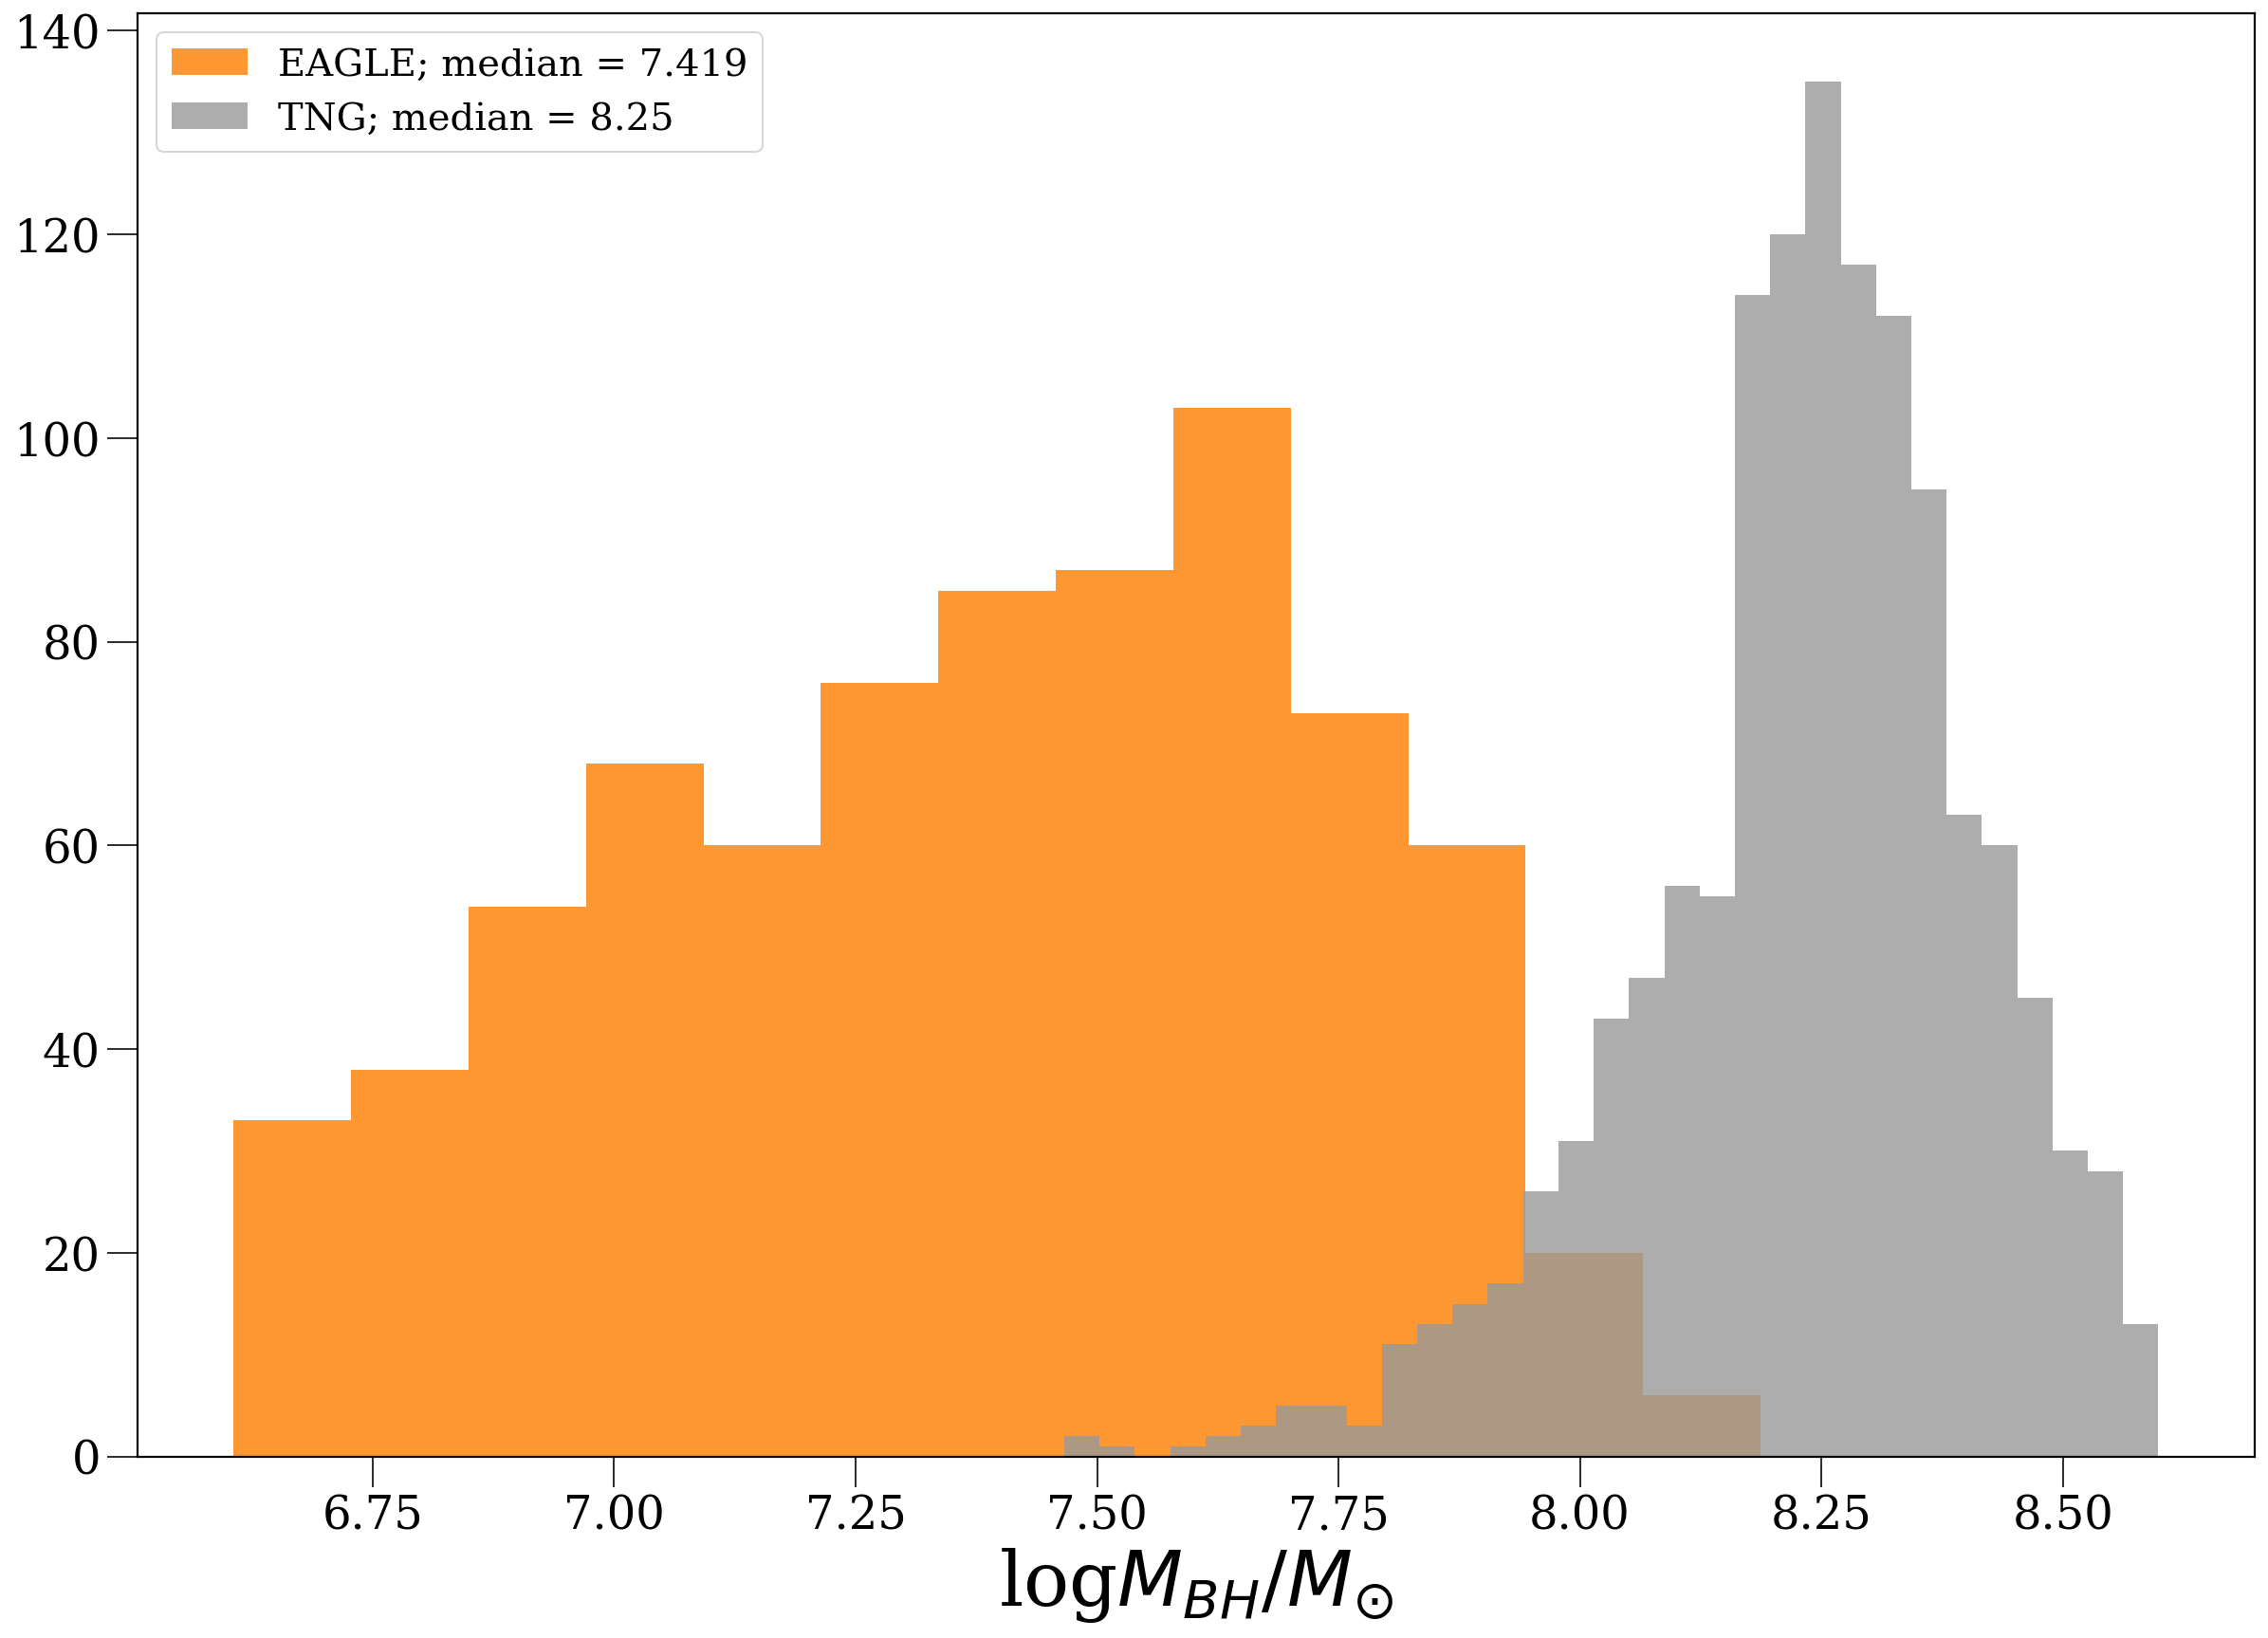

In [54]:
plt.hist(ES['MBH'], bins='fd', alpha = 0.8, color = CB_color_cycle[1], label = 'EAGLE; median = 7.419')
plt.hist(TS['MBH'], bins='fd', alpha = 0.8, color = CB_color_cycle[6], label = 'TNG; median = 8.25')
plt.legend()
plt.xlabel(r'log$M_{BH}/M_{\odot}$')
#plt.savefig('Figures/hist_mbh.png')
plt.show()

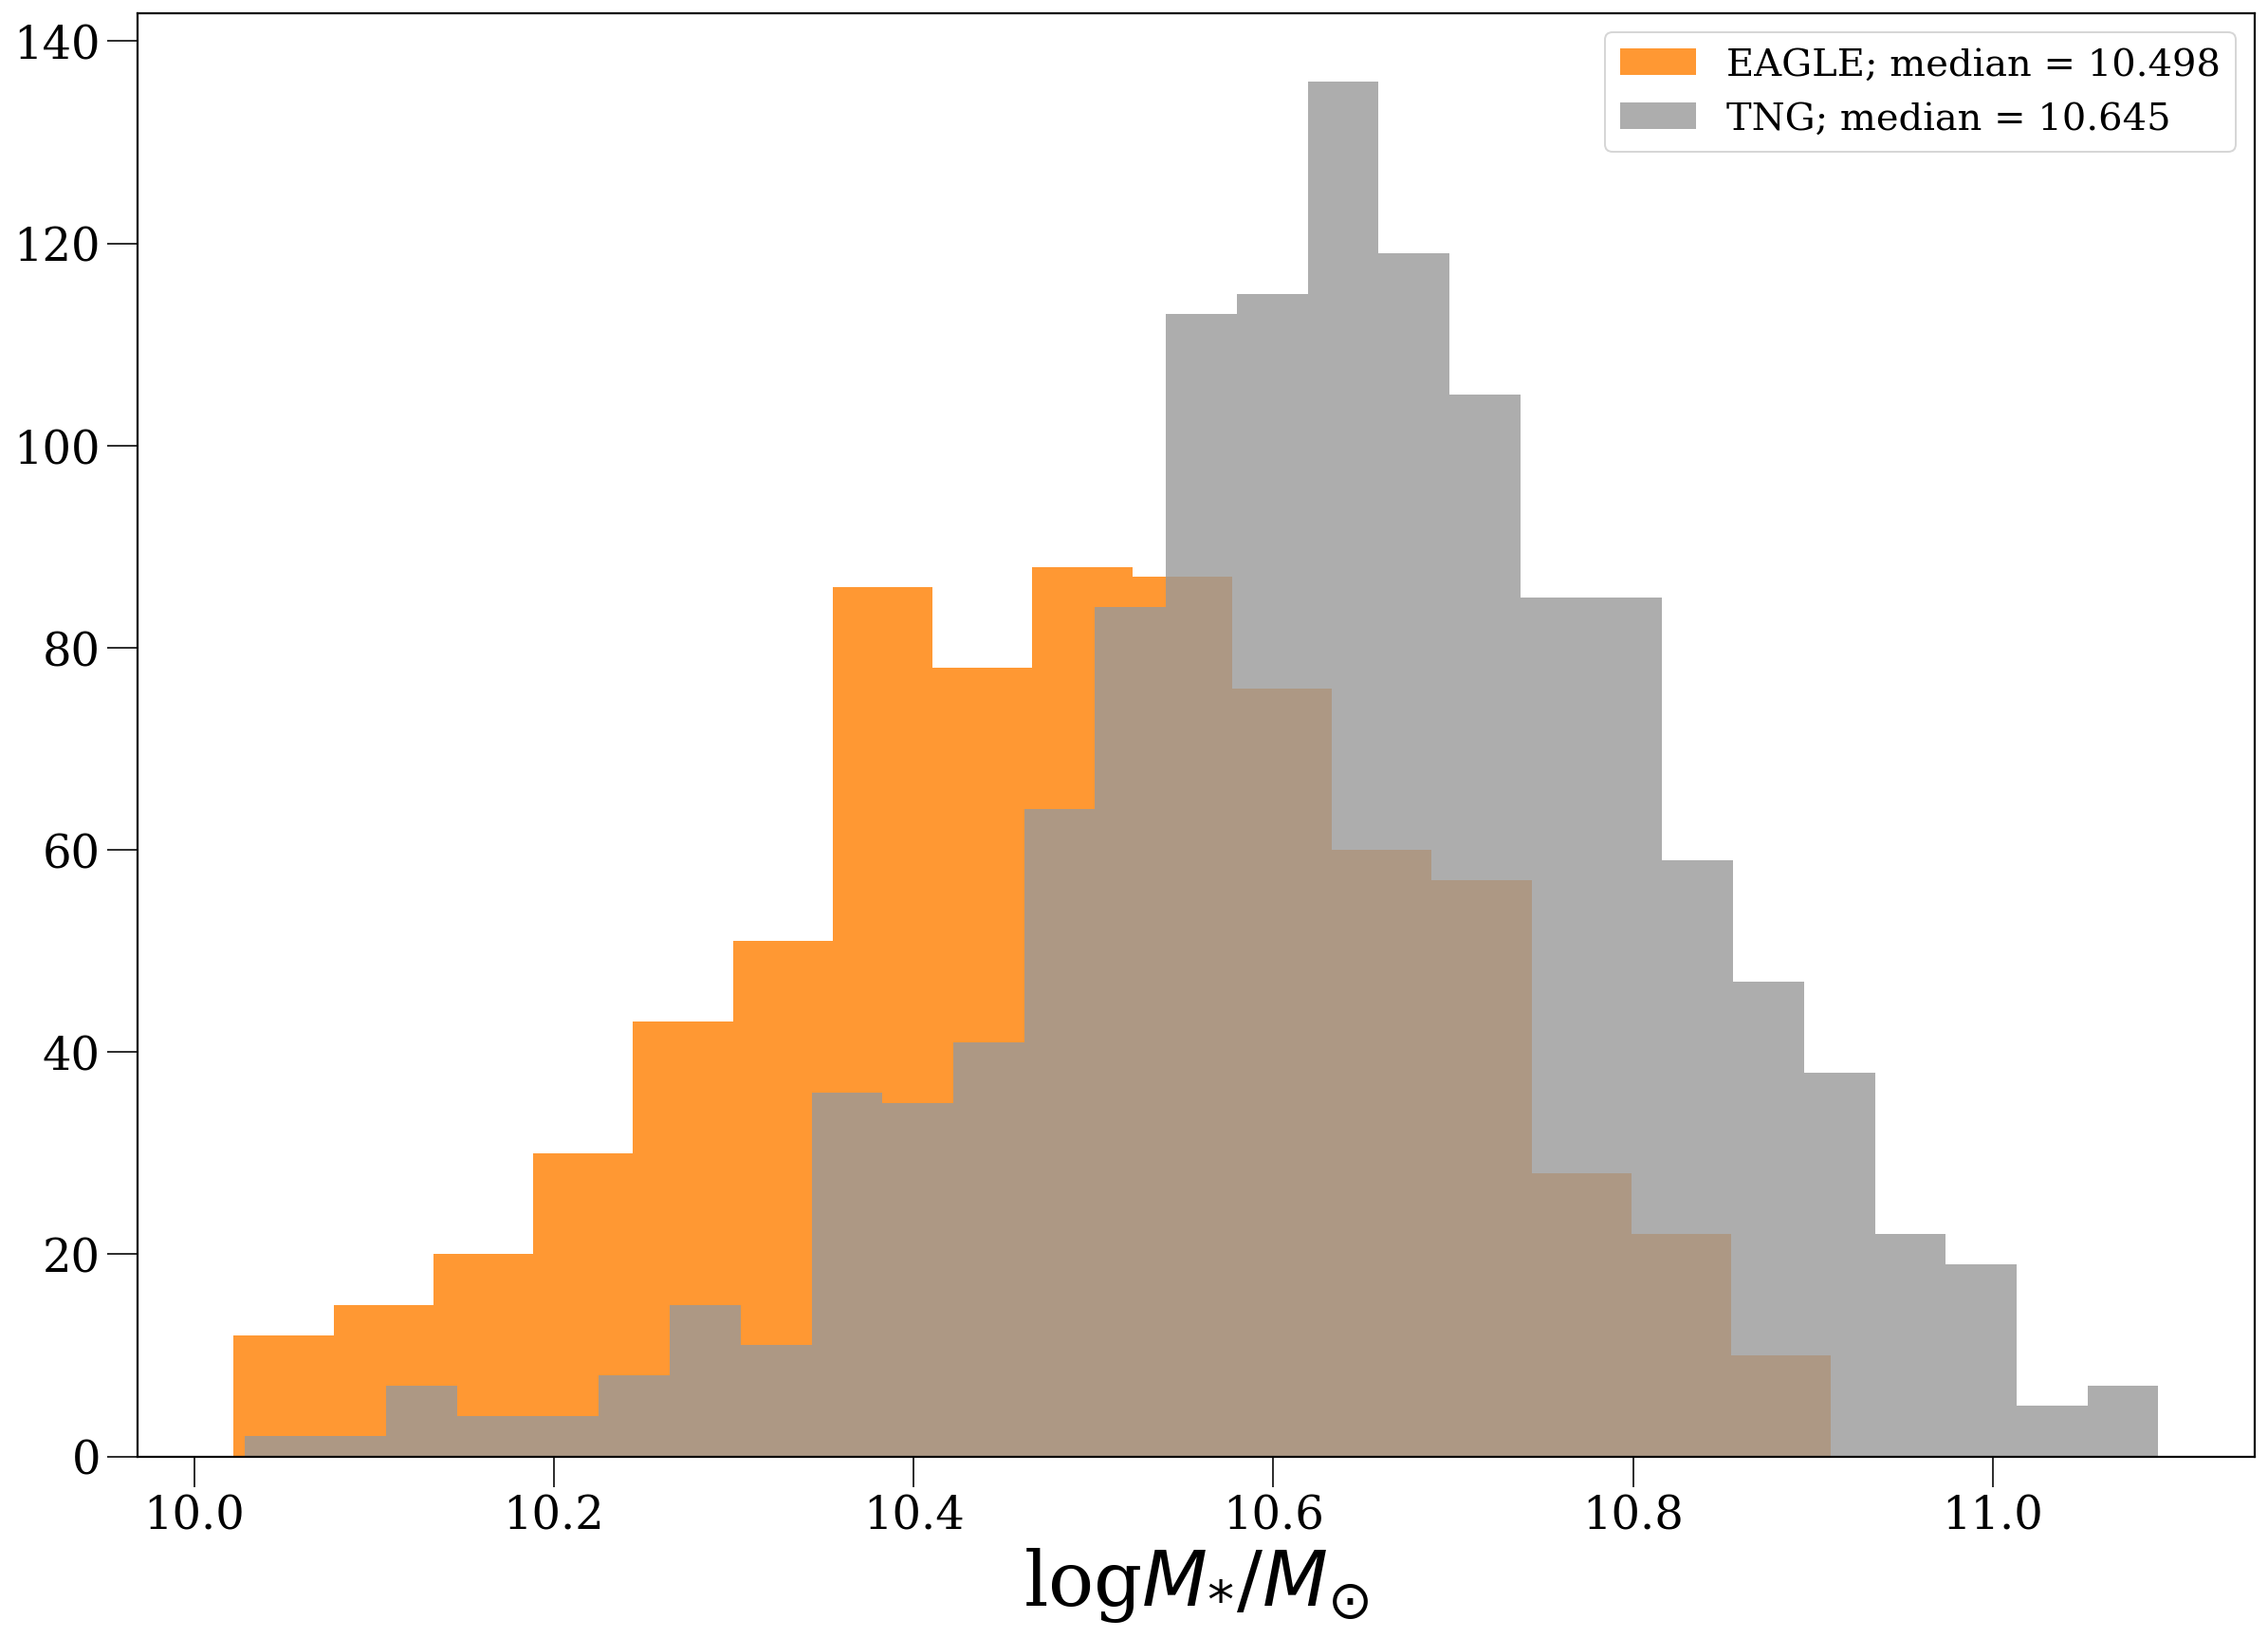

In [55]:
plt.hist(ES['MStar'], bins='fd', alpha = 0.8, color = CB_color_cycle[1], label = 'EAGLE; median = 10.498')
plt.hist(TS['MStar'], bins='fd', alpha = 0.8, color = CB_color_cycle[6], label = 'TNG; median = 10.645')
plt.legend()
plt.xlabel(r'log$M_{*}/M_{\odot}$')
#plt.savefig('Figures/hist_mstellar.png')
plt.show()